In [54]:
library(plyr)
library(ggplot2)

In [55]:
theme_settings = theme_bw() + 
  theme(panel.grid = element_blank(), 
        text=element_text(size=15), 
        plot.title = element_text(hjust = 0.5),
        legend.background=element_blank(),
        legend.key=element_blank(), 
        legend.key.height=unit(1, 'cm'),
        strip.background = element_blank(),
        legend.position = 'bottom')
N = 200
baseline = sqrt(qchisq(p = 0.95, df = N) / N)

# Heterogeneity

In [56]:
load('Rdata_pool/quadratic_incre_9.Rdata')
summary_adaptive_single['type'] = 'quadratic'
summary_volume_stein_single['type'] = 'quadratic'
quad_adp = summary_adaptive_single
quad_stein = summary_volume_stein_single

In [57]:
load('Rdata_pool/t_linear_incre_4.Rdata')
summary_adaptive_single['type'] = 'linear'
summary_volume_stein_single['type'] = 'linear'
lin_adp = summary_adaptive_single
lin_stein = summary_volume_stein_single

In [68]:
adaptive = ddply(rbind(lin_adp, quad_adp), .(b, s, lam1Type, method, design, type), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(rbind(lin_stein, quad_stein), .(b, s, lam1Type, method, design, type), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
dataset1 = rbind(adaptive, Stein_vol)
dataset1$method[dataset1$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset1$method = factor(dataset1$method, levels = c('adaptive', 'two-step stein'))
dataset1$design = factor(dataset1$design, levels = c('toeplitz'))
dataset1$lam1Type = factor(dataset1$lam1Type, levels = c('1se'))

N = 200
baseline1 = data.frame(y = c(mean(lin_adp$hsigma), mean(quad_adp$hsigma)) * sqrt(qchisq(p = 0.95, df = N) / N),
                      type = c('linear', 'quadratic'))

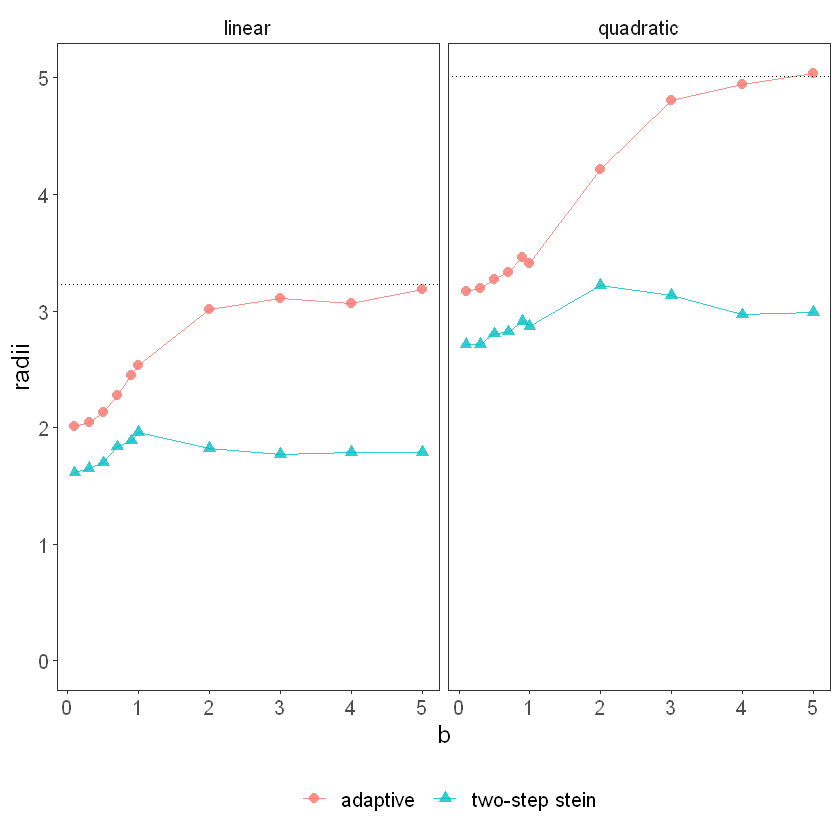

In [126]:
ggplot(data = dataset1, aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(data = baseline1, aes(yintercept = y), linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(. ~ type, scales="free_y") + 
  ylab('radii') + 
  expand_limits(y = 0) +
  theme_settings
# ggsave('r_heterogeneity.pdf', width = 6.67, height = 6.67, units = 'in')

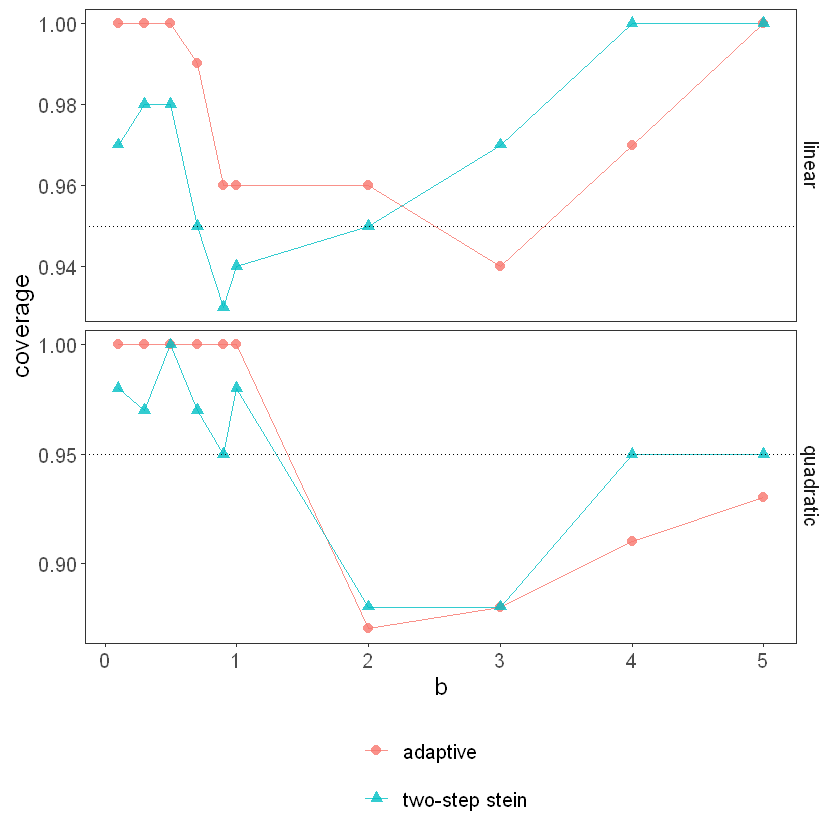

In [127]:
ggplot(data = dataset1[dataset1$s == 10, ], aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = 0.95, linetype = 3) +
  scale_color_discrete(name = element_blank(), guide = guide_legend(nrow = 2)) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(type ~ ., scales="free_y") + 
  ylab('coverage') + 
  theme_settings
# ggsave('coverage2_heterogeneity.pdf', width = 6.67, height = 6.67, units = 'in')

In [128]:
g2 = ggplot(data = dataset1, aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  xlab('') + 
  theme_settings +
#   coord_cartesian(ylim = c(0.75, 1)) +
#   facet_grid(lam1Type~.) + 
  geom_hline(yintercept = 0.95, linetype = 3)

# ggsave('coverage_heterogeneity.pdf', width = 6.67, height = 6.67, units = 'in')

# Normality

In [74]:
load('Rdata_pool/t_df4.Rdata')
summary_adaptive_single['type'] = 't_4'
summary_volume_stein_single['type'] = 't_4'
t4_adp = summary_adaptive_single
t4_stein = summary_volume_stein_single

In [75]:
load('Rdata_pool/t_df7.Rdata')
summary_adaptive_single['type'] = 't_7'
summary_volume_stein_single['type'] = 't_7'
t7_adp = summary_adaptive_single
t7_stein = summary_volume_stein_single

In [76]:
adaptive = ddply(rbind(t4_adp, t7_adp), .(b, s, lam1Type, method, design, type), summarise, 
              r = mean(r), coverage = mean(coverage))
Stein_vol = ddply(rbind(t4_stein, t7_stein), .(b, s, lam1Type, method, design, type), summarise, 
              r = mean(exp(logVol / N)), coverage = mean(coverage))
dataset2 = rbind(adaptive, Stein_vol)
dataset2$method[dataset1$method == 'twoStepSteinVolume'] = 'two-step stein'
dataset2$method = factor(dataset1$method, levels = c('adaptive', 'two-step stein'))
dataset2$design = factor(dataset1$design, levels = c('toeplitz'))
dataset2$lam1Type = factor(dataset1$lam1Type, levels = c('1se'))

N = 200
baseline2 = data.frame(y = c(mean(t4_adp$hsigma), mean(t7_adp$hsigma)) * sqrt(qchisq(p = 0.95, df = N) / N),
                      type = c('t_4', 't_7'))

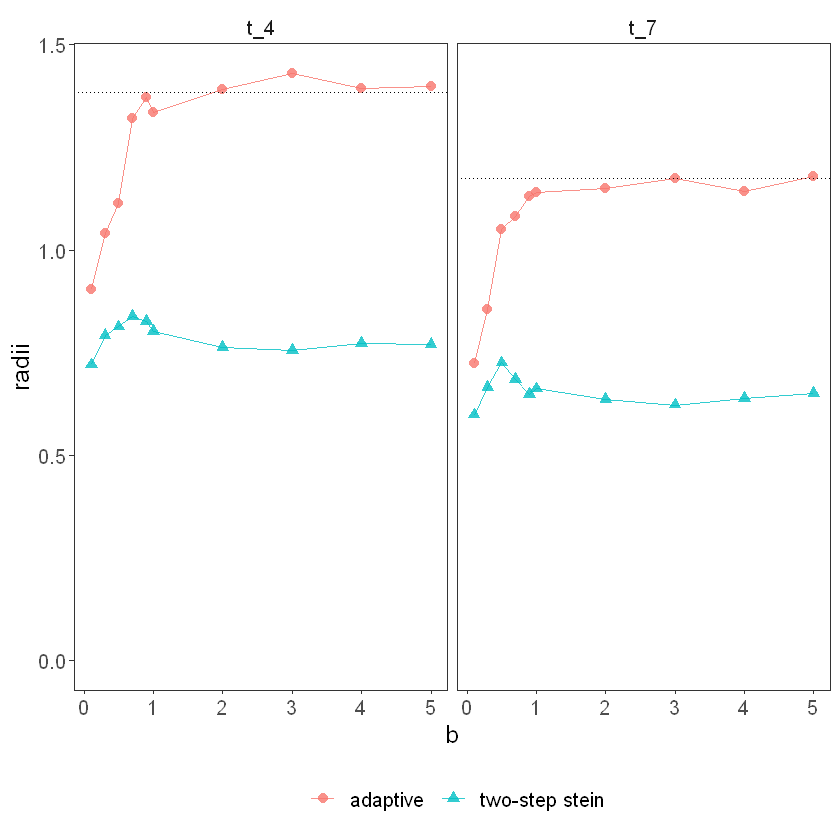

In [129]:
ggplot(data = dataset2, aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(data = baseline2, aes(yintercept = y), linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(. ~ type, scales="free_y") + 
  ylab('radii') + 
  expand_limits(y = 0) +
  theme_settings


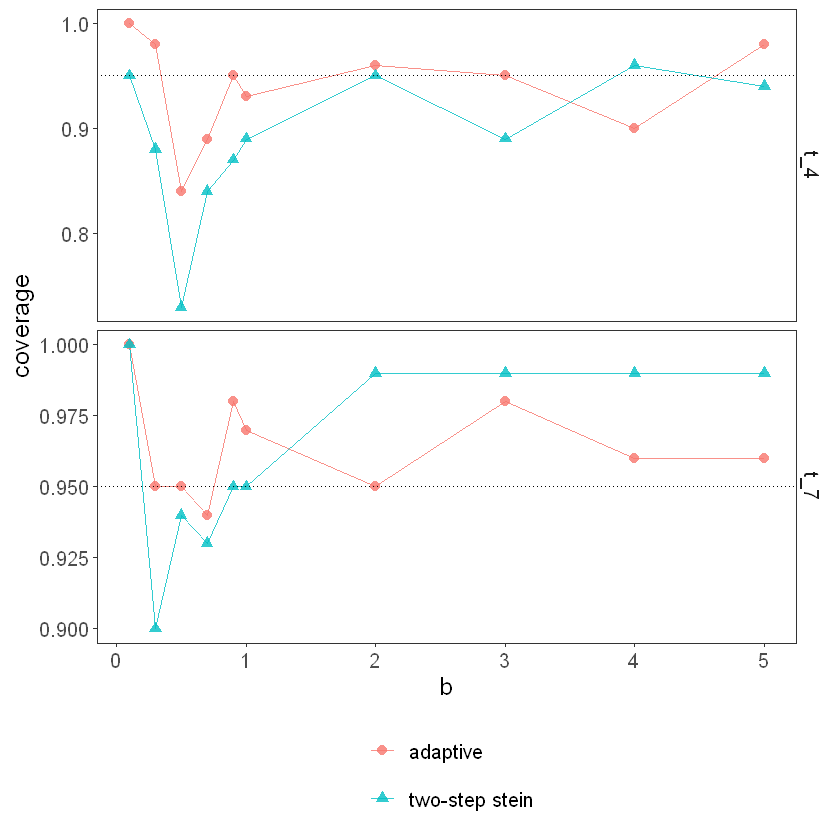

In [130]:
ggplot(data = dataset2, aes(x = b, y = coverage, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(yintercept = 0.95, linetype = 3) +
  scale_color_discrete(name = element_blank(), guide = guide_legend(nrow = 2)) +
  scale_shape_discrete(name = element_blank()) +
  facet_grid(type ~ ., scales="free_y") + 
  ylab('coverage') + 
  theme_settings
# ggsave('coverage2_t_distr.pdf', width = 6.67, height = 6.67, units = 'in')

In [131]:
g3 = ggplot(data = dataset2, aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  xlab('') + 
  theme_settings +
#   coord_cartesian(ylim = c(0.75, 1)) +
#   facet_grid(lam1Type~.) + 
  geom_hline(yintercept = 0.95, linetype = 3)

# ggsave('coverage_t_distr.pdf', width = 6.67, height = 6.67, units = 'in')

# Combination

In [156]:
dataset3$type

[1] linear    quadratic linear    quadratic linear    quadratic linear   
 [8] quadratic linear    quadratic linear    quadratic linear    quadratic
[15] linear    quadratic linear    quadratic linear    quadratic linear   
[22] quadratic linear    quadratic linear    quadratic linear    quadratic
[29] linear    quadratic linear    quadratic linear    quadratic linear   
[36] quadratic linear    quadratic linear    quadratic t_4       t_7      
[43] t_4       t_7       t_4       t_7       t_4       t_7       t_4      
[50] t_7       t_4       t_7       t_4       t_7       t_4       t_7      
[57] t_4       t_7       t_4       t_7       t_4       t_7       t_4      
[64] t_7       t_4       t_7       t_4       t_7       t_4       t_7      
[71] t_4       t_7       t_4       t_7       t_4       t_7       t_4      
[78] t_7       t_4       t_7      
Levels: t_4 t_7 linear quadratic

In [167]:
dataset1$type2 = "inconstant variance"
dataset2$type2 = "t-distribution"
dataset3 = rbind(dataset1, dataset2)
dataset3$type = factor(dataset3$type, levels=c("t_4", "t_7", "linear", "quadratic")) 
dataset3$type2 = factor(dataset3$type2, levels=c("t-distribution", "inconstant variance")) 


baseline3 = data.frame(y = c(mean(lin_adp$hsigma), mean(quad_adp$hsigma),
                            mean(t4_adp$hsigma), mean(t7_adp$hsigma)) * sqrt(qchisq(p = 0.95, df = N) / N),
                    type = c('linear', 'quadratic', 't_4', 't_7'))

g1 = ggplot(data = dataset3, aes(x = b, y = r, color = method, shape = method)) + 
  geom_line(size = 0.5, alpha = 0.8) +
  geom_point(size = 2.5, alpha = 0.8) +
  geom_hline(data = baseline3, aes(yintercept = y), linetype = 3) +
  scale_color_discrete(name = element_blank()) +
  scale_shape_discrete(name = element_blank()) +
  facet_wrap(~ type, scales="free_y", nrow = 2) + 
  ylab('radii') + 
  expand_limits(y = 0) +
  theme_settings

In [168]:
g2 = ggplot(data = dataset3, aes(x = method, y = coverage)) + 
  geom_boxplot() + 
  xlab('') + 
  theme_settings +
#   coord_cartesian(ylim = c(0.75, 1)) +
  facet_grid(. ~ type2) + 
  geom_hline(yintercept = 0.95, linetype = 3)

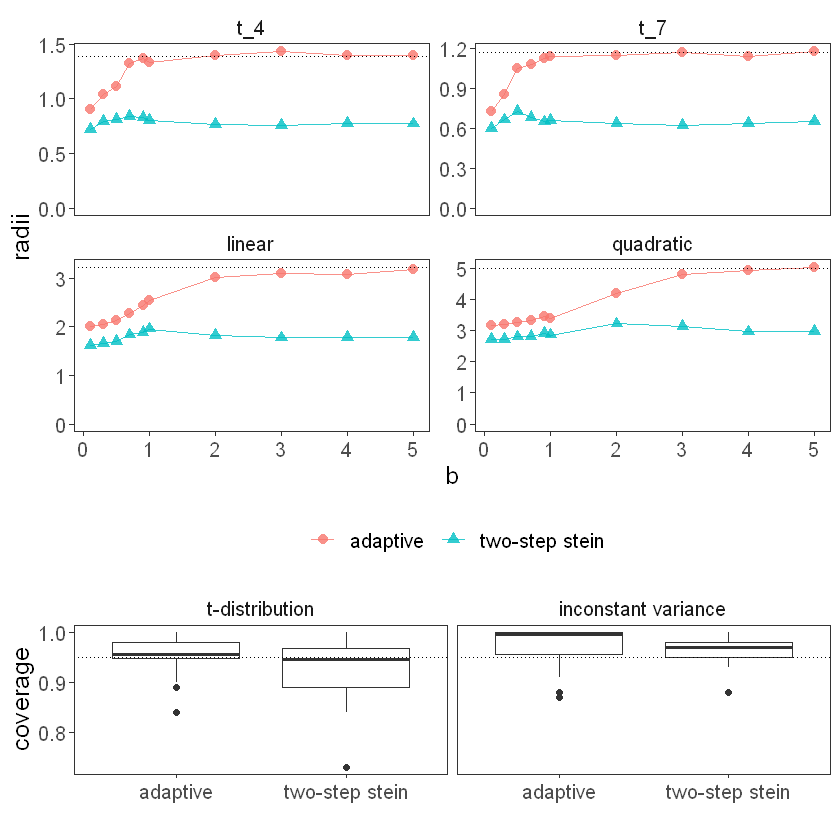

In [169]:
library(gridBase)
library(gridExtra)

fig_r = grid.arrange(g1, g2, ncol = 1, heights = c(9, 4))
ggsave('normality_homogeneity.pdf', fig_r, width = 6.67, height = 6.67, units = 'in')